In [1]:
import os
try:
    os.chdir(os.path.join(os.getcwd(), '..')) # '.' if the path is to current folder
    print(os.getcwd())
except:
    pass

/Users/RAUL.ALARES/Documents/src/clothes-extractor


In [2]:
from dataset.dataset import ClothesDataLoader, ClothesDataset
import matplotlib.pyplot as plt
from config import Config
from utils.utils import DatasetType

In [3]:
!pwd

/Users/RAUL.ALARES/Documents/src/clothes-extractor


In [4]:
cfg = Config()
cfg.dataset_dir = "./data/zalando-hd-resized"
cfg.dataset_mode = "train"
cfg.load_height = 224
cfg.load_width = 224

clothes_dataset = ClothesDataset(cfg,dataset_mode="train", device="cpu")
clothes_loader = ClothesDataLoader(dataset=clothes_dataset, batch_size=cfg.batch_size)

In [5]:
result = clothes_dataset[0]
print('Imaname: ', result["img_name"])
#print('Img shape: ', result["img"].shape)
#print('Cloth shape: ', result["cloth"].shape)
print('Target: ', result["target"].shape)
print('centered_mask_body: ', result["centered_mask_body"].shape)

# Similarly, we can sample a BATCH from the dataloader by running over its iterator
# iter_ = iter(clothes_loader)
# bimg, blabel = next(iter_)
# print('Batch Img shape: ', bimg.shape)
# print('Batch Label shape: ', blabel.shape)
# print('Batch Img shape: ', bimg.shape)
# print('Batch Label shape: ', blabel.shape)
# print(f'The Batched tensors return a collection of {bimg.shape[0]} grayscale images \
# ({bimg.shape[1]} channel, {bimg.shape[2]} height pixels, {bimg.shape[3]} width \
# pixels)')
# print(f'In the case of the labels, we obtain {blabel.shape[0]} batched integers, one per image')

Imaname:  00000_00.jpg
Target:  torch.Size([3, 224, 224])
centered_mask_body:  torch.Size([3, 224, 224])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 223.5, 223.5, -0.5)

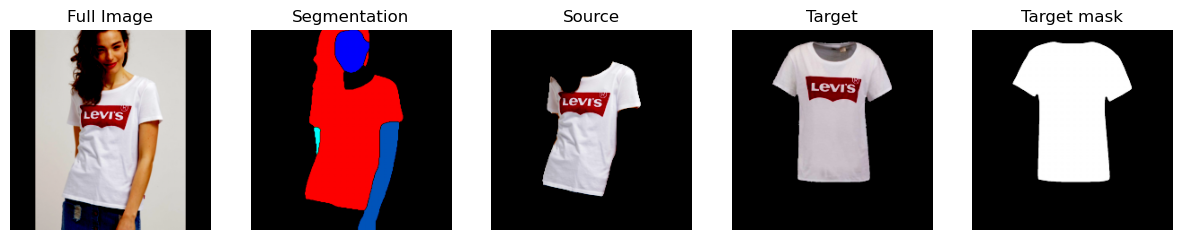

In [7]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(15, 15))
ax1.imshow(result["img"].permute(1,2,0))
ax1.set_title("Full Image")
ax1.axis("off")
ax2.imshow(result["mask_body_parts"].permute(1,2,0))
ax2.set_title("Segmentation")
ax2.axis("off")
ax3.imshow(result["centered_mask_body"].permute(1,2,0))
ax3.set_title("Source")
ax3.axis("off")
ax4.imshow(result["target"].permute(1,2,0))
ax4.set_title("Target")
ax4.axis("off")
ax5.imshow(result["cloth_mask"].permute(1,2,0), cmap='grey')
ax5.set_title("Target mask")
ax5.axis("off")
